In [2]:
# data path
DATA_PH = "../data/Combined Cycle Power Plant Data Set.csv"

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# import data
df = pd.read_csv(DATA_PH)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.5,1009.23,96.62,473.9


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AT      47844 non-null  object
 1   V       47844 non-null  object
 2   AP      47844 non-null  object
 3   RH      47844 non-null  object
 4   PE      47844 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [5]:
def convert_to_numeric(df):
    """
    errors = 'coerce':
        Convert non-numeric values to NaN.
    """
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df = convert_to_numeric(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [6]:
# seaborn color palettes we will be using 

palette_1 = sns.color_palette('Accent', 6)
palette_2 = sns.color_palette('Set1', 6)
palette_3 = sns.color_palette('BrBG')
palette_4 = sns.color_palette('CMRmap')
palette_5 = sns.color_palette('Paired', 6)
palette_6 = sns.color_palette('RdYlBu')
palette_binary_1 = sns.color_palette('Accent_r', 2)
palette_binary_2 = sns.color_palette('Set1', 2)
palette_binary_3 = sns.color_palette('Set2', 2)

plt.style.use('fivethirtyeight')

C:\Users\M4TECH\AppData\Local\Temp\ipykernel_12480\1960652515.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PE", y=col, data=df, palette=palette_6,size=0.1,legend=False)
C:\Users\M4TECH\AppData\Local\Temp\ipykernel_12480\1960652515.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PE", y=col, data=df, palette=palette_6,size=0.1,legend=False)
C:\Users\M4TECH\AppData\Local\Temp\ipykernel_12480\1960652515.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PE", y=col, data=df, palette=palette_6,size=0.1,legend=False)
C:\Users\M4TECH\AppData\Local\Temp\ipykernel_12480\1960652515.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PE", y=col, data=df, palette=palette_6,size=0.1,legend=False)


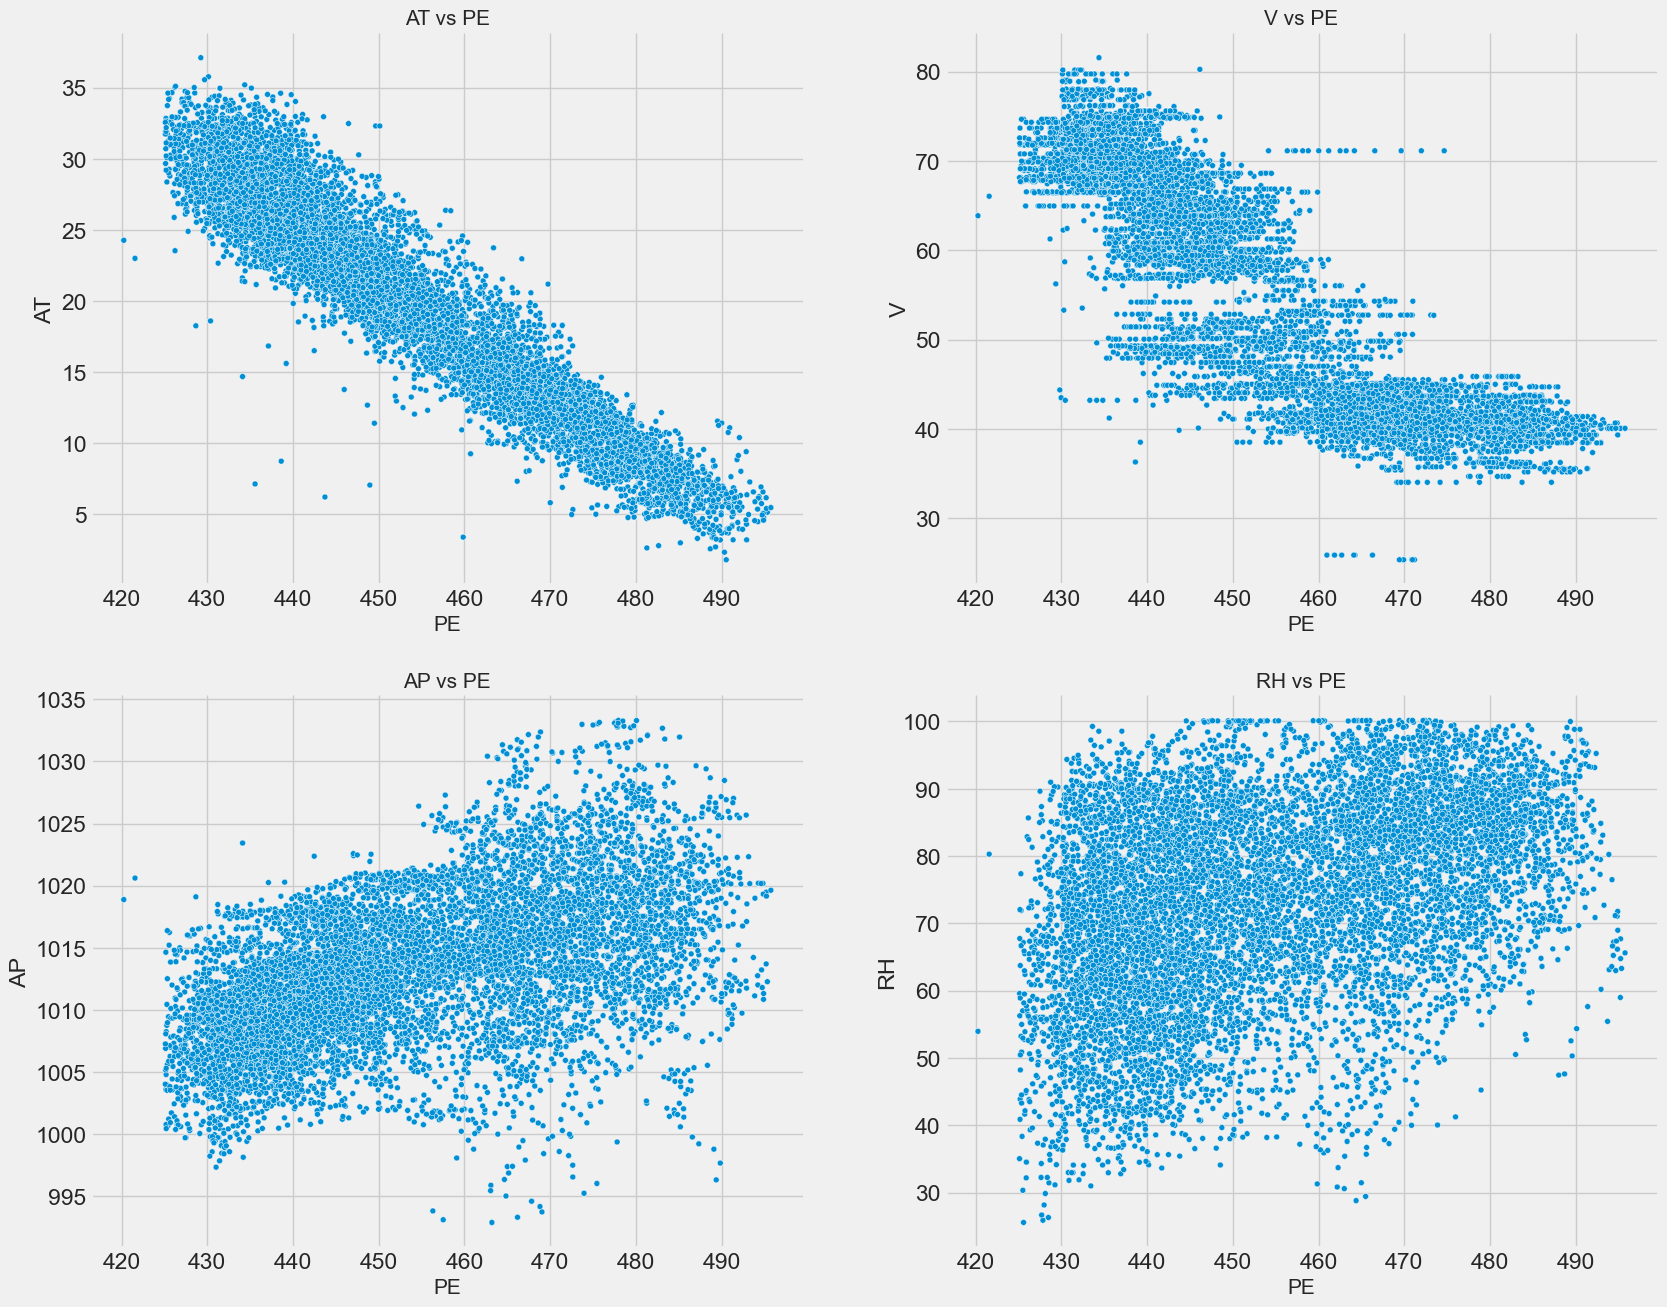

In [44]:
# see the data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 15))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x="PE", y=col, data=df, palette=palette_6,size=0.1,legend=False)
    plt.title(f"{col} vs PE", fontsize=15)
    plt.xlabel("PE", fontsize=15)
    
sns.despine()
plt.show()

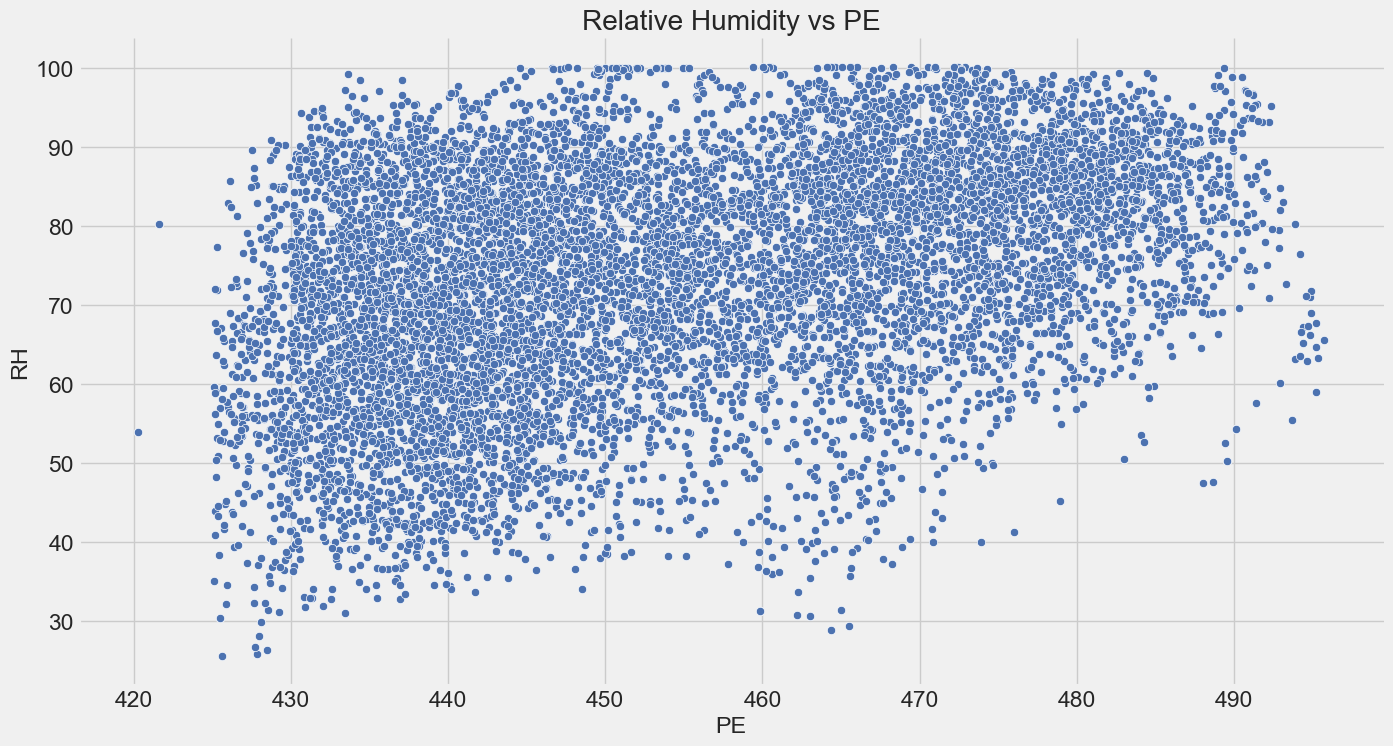

In [42]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))
sns.scatterplot(x="PE", y="RH", data=df,legend=False,color='b').set(title="Relative Humidity vs PE")
sns.despine()
plt.show()

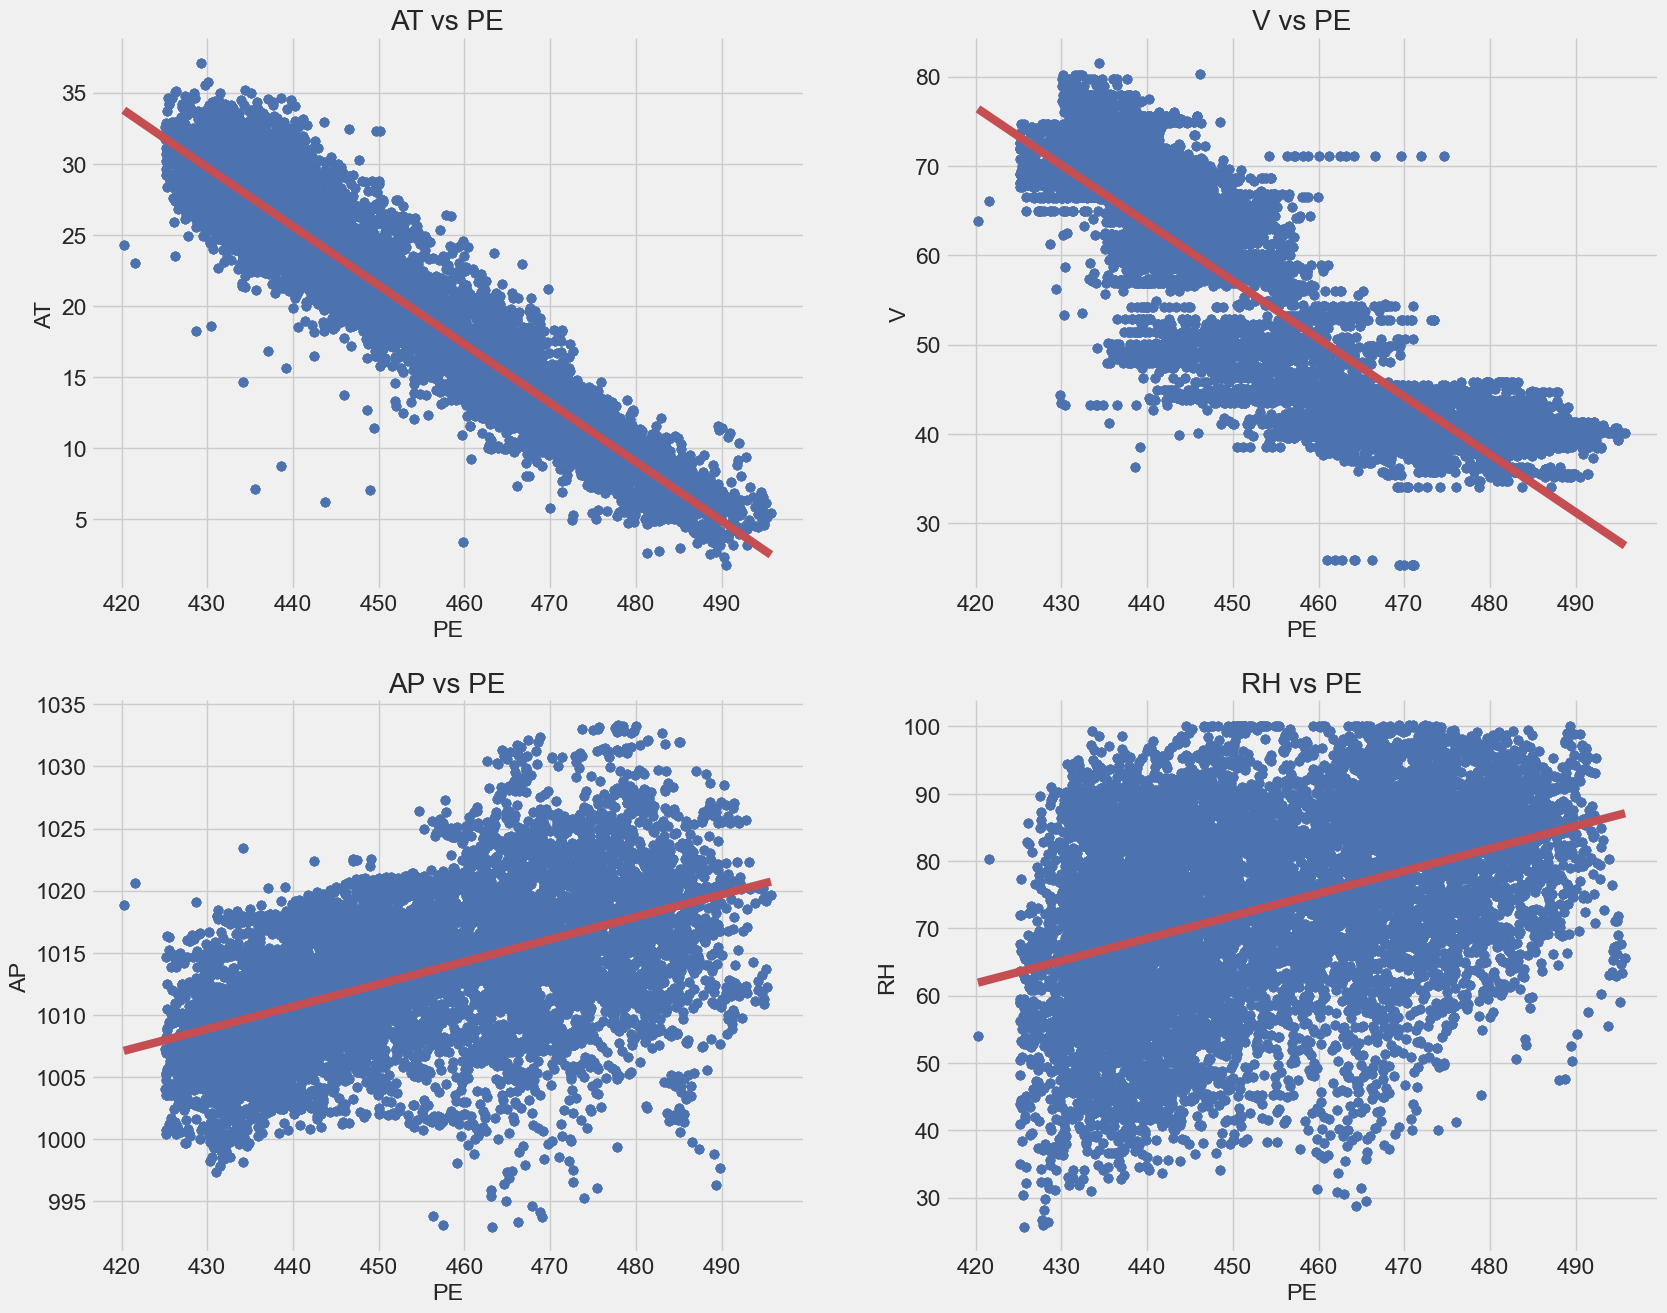

In [50]:
# check the linearization of the data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 15))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.regplot(x="PE", y=col, data=df, scatter_kws={"color": "b"},line_kws={"color": "r"}).set(title=f"{col} vs PE")
    
sns.despine()
plt.show()

As we can see from the plots above, there is a `linear relationship` between `PE` (target variable) and the other features.
This is a good sign as it means that we can use **linear regression** (multivariate linear regression) to model the relationship between the features and the target variable.

>the equation is: 
>$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4$$
> $$ = \sum_{i=1}^{4} \beta_i X_i  + \beta_0$$
> where $X_1, X_2, X_3, X_4$ are the features and $y$ is the target variable, 

**NOTE** : $\beta_0$ is the intercept and $\beta_1$ is the coefficient of the feature.


C:\Users\M4TECH\AppData\Local\Temp\ipykernel_12480\2247196839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes, kde=True, hist_kws={"alpha": 0.6},color='y').set(title=f"{col} Distribution")
C:\Users\M4TECH\AppData\Local\Temp\ipykernel_12480\2247196839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

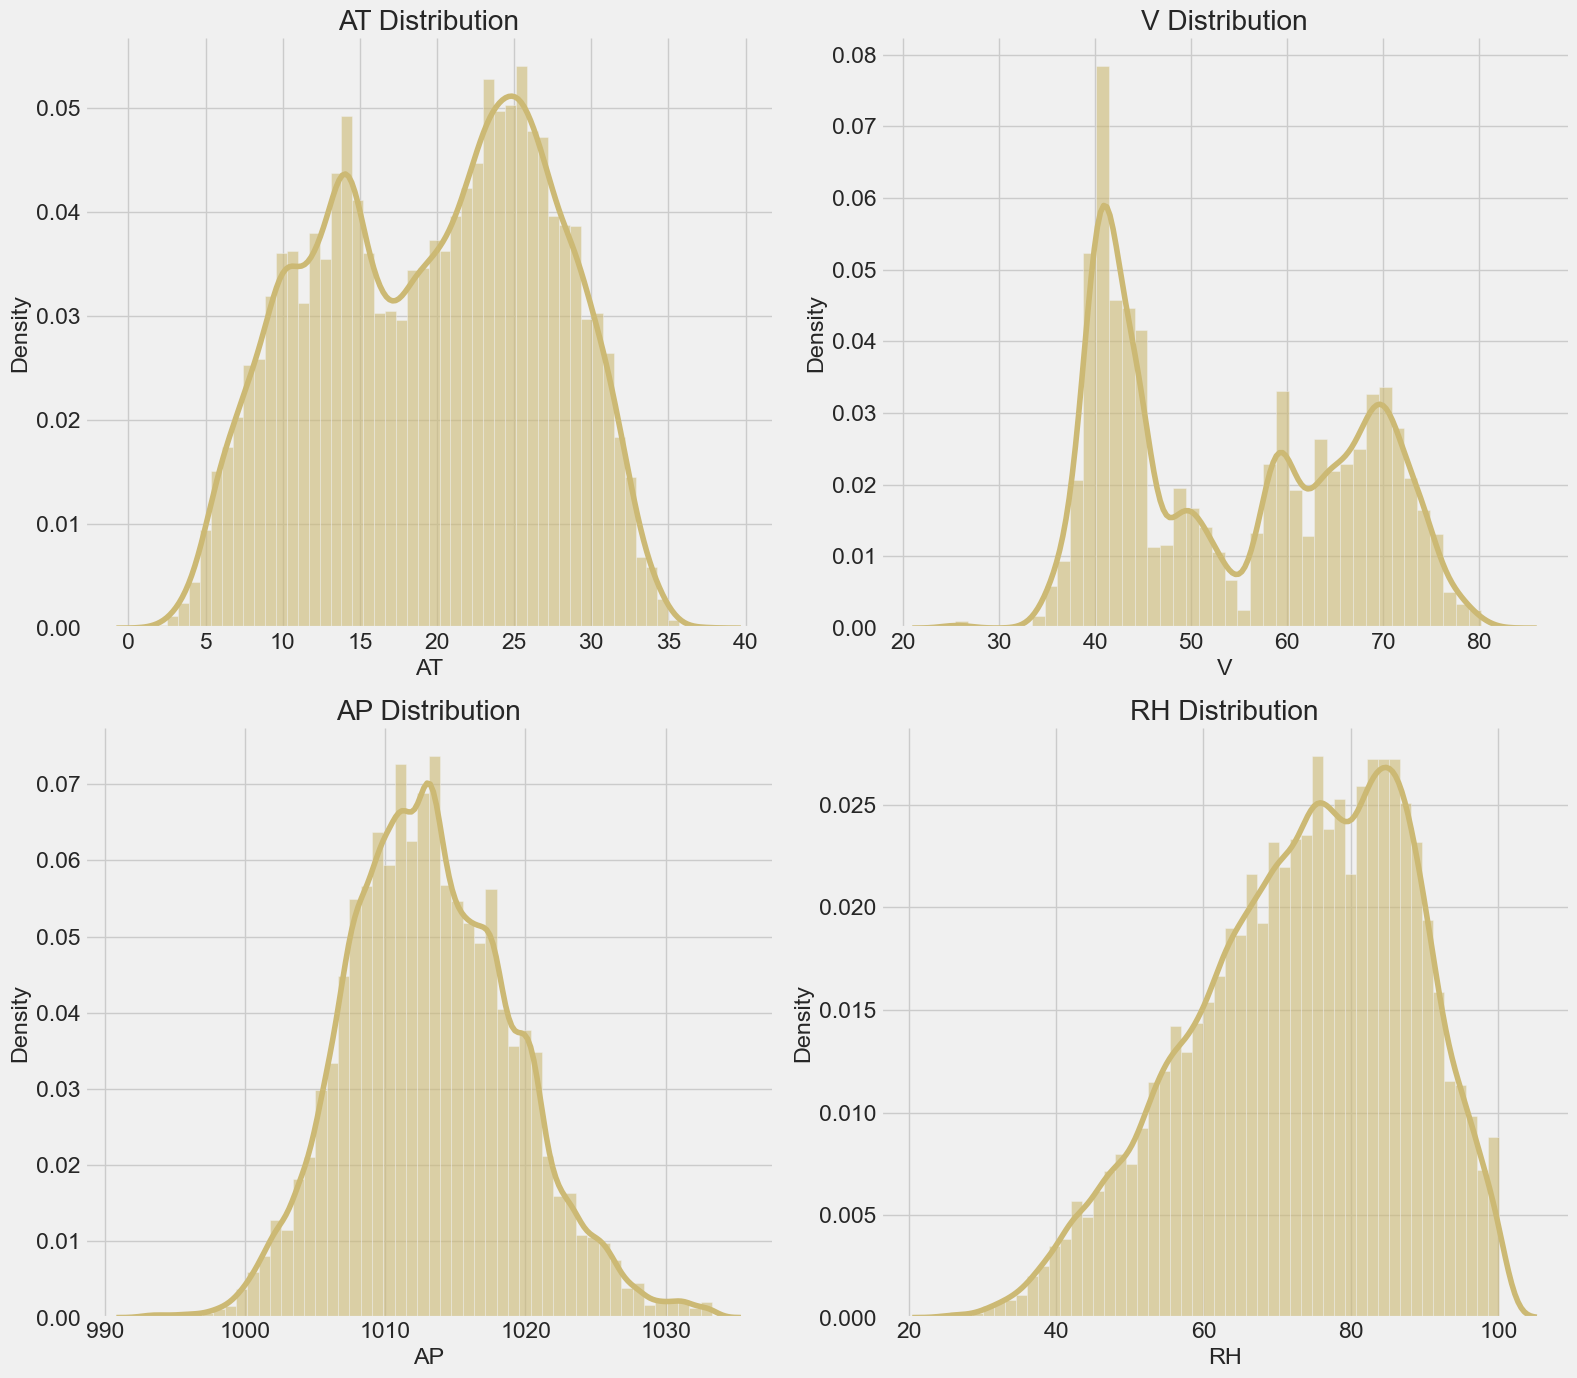

In [29]:
# distribution of the variables
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for axes, col in zip(axes.flatten(), df[:-1]):
    sns.distplot(df[col], ax=axes, kde=True, hist_kws={"alpha": 0.6},color='y').set(title=f"{col} Distribution")

plt.tight_layout()
sns.set(font_scale=1.5)
sns.despine()
plt.show()``

As we can see from the above plots, the distributions of the variables are not normally distributed except for AP.
We will use the `log transformation` to make them normally distributed.

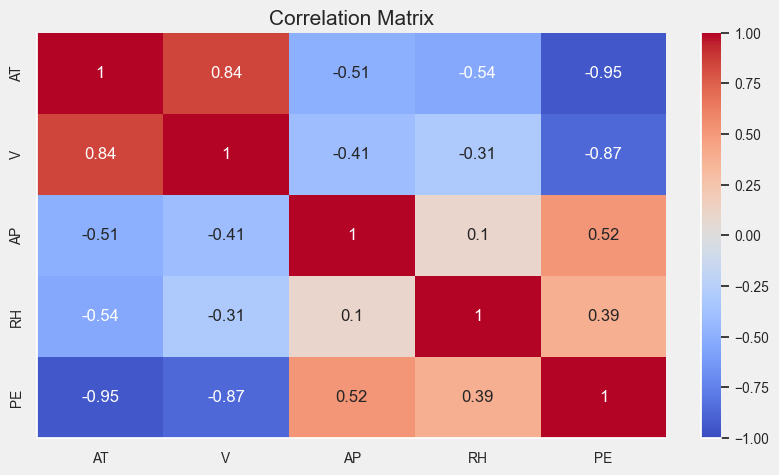

In [124]:
# correlation matrix
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
sns.set(font_scale=0.9)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1,annot_kws={"size": 12},
            cbar_kws={"fraction": 0.046})

plt.title("Correlation Matrix", fontsize=15)
sns.despine()
plt.show()

We can see from above correlation matrix that the `v` and `AT` features are highly correlated to the target variable but in negative correlation with `PE`.

We can see also that there is a strong positive correlation between `V` and `AT`